# Libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

# Dataset

In [75]:
data = pd.read_csv("C:\\Users\\kamlesh prajapat\\OneDrive\\Desktop\\Books\\Internship\\electric_vehicle_charging_station_list.csv")


In [76]:
data.sample(5)

,no,region,address,aux addres,latitude,longitude,type,power,service
126,127,Noida Authority,"Near RTO OfficeSector 33A, Noida, Ghaziabad, U...","Electric Vehicle Charger, Near RTO OfficeSecto...",28.582120,77.326699,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
95,96,NDMC,Outside Chelmsford Club/ Opposite CSIR Buildin...,"Electric Vehicle Charger, Outside Chelmsford C...",28.617783,77.212996,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
192,193,NDMC,"Talkatora Stadium, President's Estate, New Del...","Electric Vehicle Charger, Talkatora Stadium, P...",28.625294,77.195234,DC-001,15 kW,Self Service
165,166,Noida Authority,"Charger 2, Sec-25A: Spice Mall plot area","Electric Vehicle Charger, Charger 2, Sec-25A: ...",28.586214,77.341103,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
180,181,NDMC,"Talkatora Garden, President's Estate, New Delh...","Electric Vehicle Charger, Talkatora Garden, Pr...",28.624836,77.195244,CCS/ChADEMO/ Type 2 AC,142kW,Self Service


# Shape of the Dataset

In [77]:
data.shape

(202, 9)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          202 non-null    int64  
 1   region      202 non-null    object 
 2   address     202 non-null    object 
 3   aux addres  202 non-null    object 
 4   latitude    202 non-null    float64
 5   longitude   202 non-null    float64
 6   type        202 non-null    object 
 7   power       202 non-null    object 
 8   service     202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB


In [79]:
data.describe()

,no,latitude,longitude
count,202.000000,202.000000,202.000000
mean,101.500000,25.960987,78.418002
std,58.456537,5.616108,3.097664
min,1.000000,8.481051,76.277781
25%,51.250000,28.535516,77.212996
50%,101.500000,28.580286,77.226252
75%,151.750000,28.617783,77.375216
max,202.000000,28.642892,88.509064


# Checking for duplicate values

In [80]:
data.duplicated().sum()

0

# Checking for null values

In [81]:
data.isna().sum()

no            0
region        0
address       0
aux addres    0
latitude      0
longitude     0
type          0
power         0
service       0
dtype: int64

# Droping the no and service columns

In [82]:
data.drop(columns=["no"],axis=1,inplace=True)
data.drop(columns=["service"],axis=1,inplace=True)
data.sample(5)

,region,address,aux addres,latitude,longitude,type,power
143,SDMC,"c/o SDMCHauz Khas VillageNew Delhi,Delhi - 110016","Electric Vehicle Charger, c/o SDMCHauz Khas Vi...",28.547170,77.200275,CCS/ChADEMO/ Type 2 AC,142kW
140,Noida Authority,"Sector 50 Central Market, Noida, Uttar Prades...","Electric Vehicle Charger, Sector 50 Central ...",28.571997,77.369368,AC-001,10(3.3 kW each)
171,CMRL,"Tirumangalam Metro station, Chennai","Electric Vehicle Charger, Tirumangalam Metro s...",12.991844,80.141801,CCS/ChADEMO/ Type 2 AC,142kW
173,ANERT,"KTDC Tourist Reception Centre Shanmugham road,...","Electric Vehicle Charger, KTDC Tourist Recepti...",9.976921,76.277781,CCS/ChADEMO/ Type 2 AC,142kW
69,SDMC,"SDMC Parking, SDA Market, Hauz Khas, New Delhi...","Electric Vehicle Charger, SDMC Parking, SDA Ma...",28.546391,77.196354,DC-001,15 kW


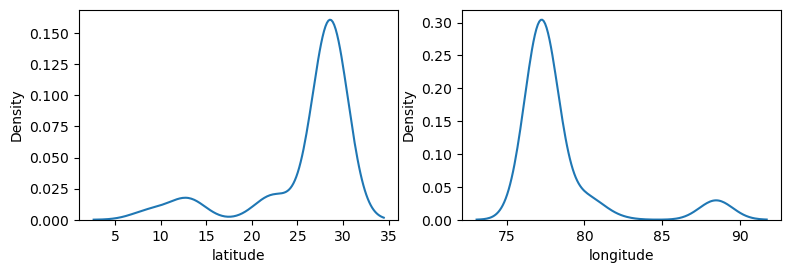

In [83]:
plt.figure(figsize=(14,6))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(2, 3, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

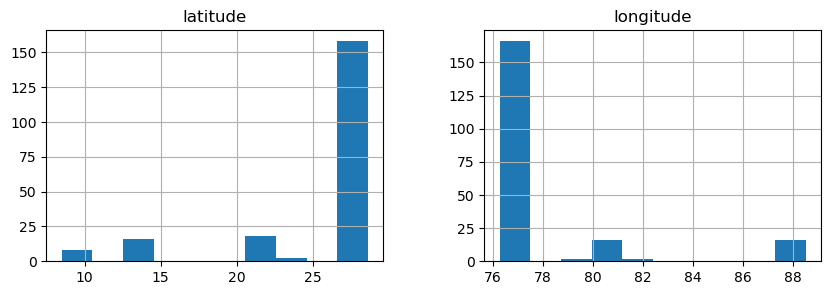

In [84]:
data.hist(figsize=(10,3))
plt.show()

Outside Chelmsford Club/ Opposite CSIR Building, Rafi Marg, Sansad Marg Area, New Delhi 110001    6
Between kirti mann plaza and NMC hospital Sector 30 Noida                                         5
Gate No. 1, Lodhi Garden, Lodhi Estate, Lodhi Road, New Delhi 110003                              4
road between sector 124 & 125 and beside SPCl Sector Road, Noida, Uttar Pradesh, 201313           3
Sector 50  Central Market, Noida, Uttar Pradesh, 201305                                           3
                                                                                                 ..
Near Tata Advance Systems, sector- 59, Noida                                                      1
Op. C&R Textiles Ltd, sector-60, Noida                                                            1
Sector 142, Noida, Uttar Pradesh, 201305                                                          1
Outside Standard Chartered Bank, Sardar Patel Bhawan, Sansad Marg, New Delhi- 110001              1


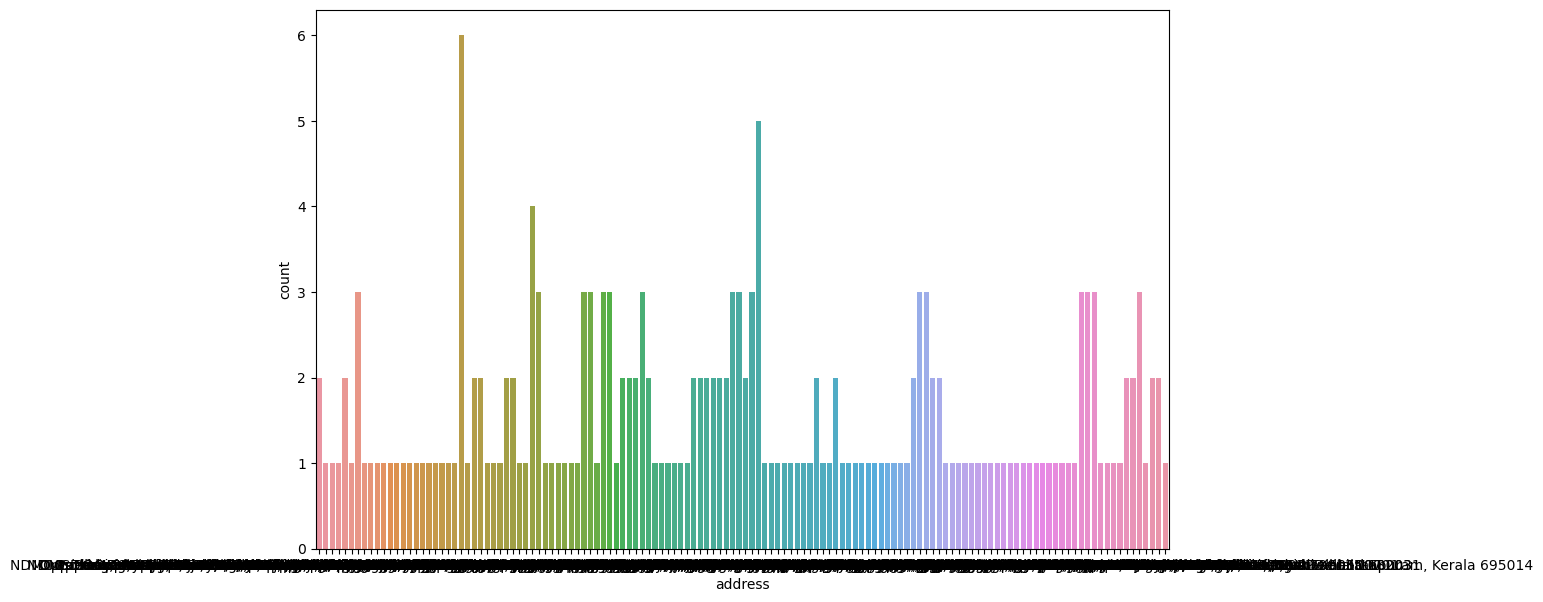

In [85]:
plt.figure(figsize=(11,7))
sns.countplot(data['address'])
data['address'].value_counts()

<AxesSubplot:>

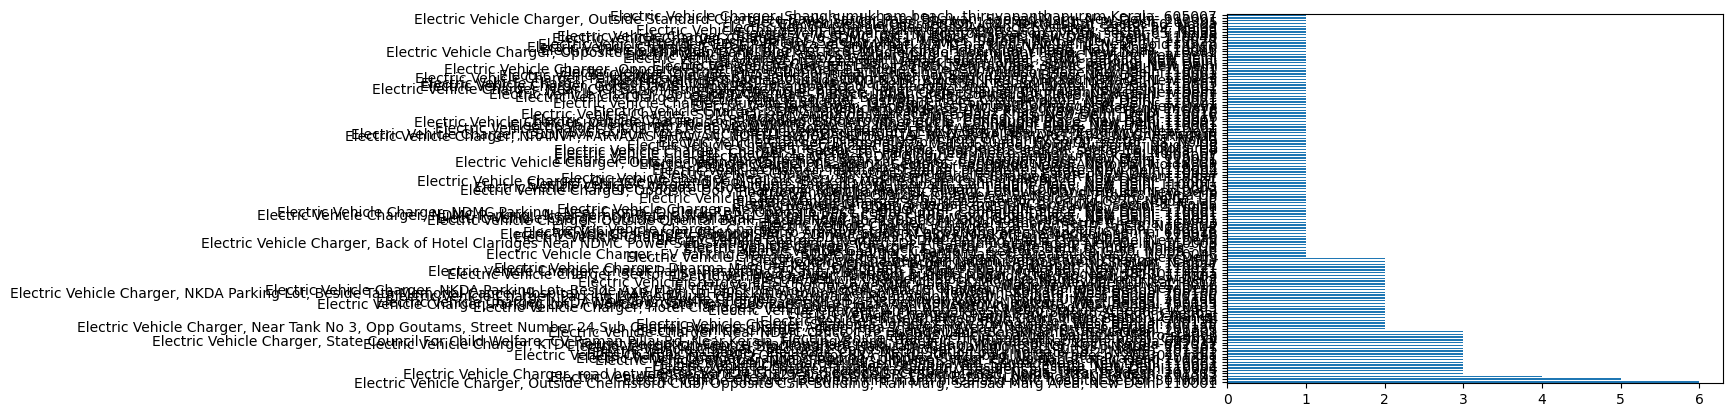

In [145]:
data['aux addres'].value_counts().plot(kind='barh')

15 kW              115
142kW               67
10(3.3 kW each)     20
Name: power, dtype: int64

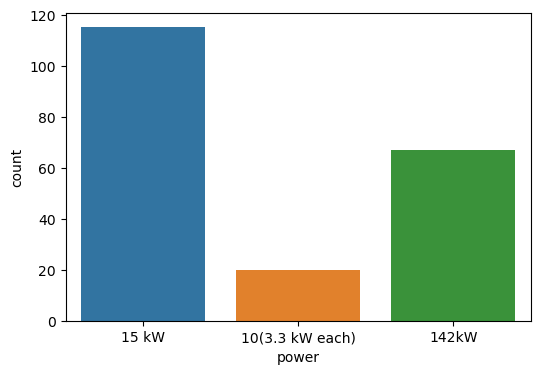

In [148]:
plt.figure(figsize=(6,4))
sns.countplot(data['power'])
data['power'].value_counts()

DC-001                    115
CCS/ChADEMO/ Type 2 AC     67
AC-001                     20
Name: type, dtype: int64

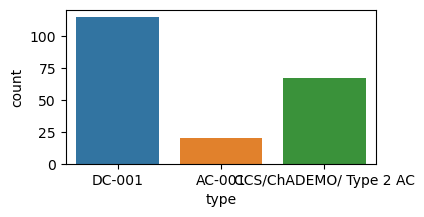

In [149]:
plt.figure(figsize=(4,2))
sns.countplot(data['type'])
data['type'].value_counts()

In [89]:
data['region'].value_counts()

NDMC               74
Noida Authority    53
SDMC               31
CMRL               16
NKDA               16
ANERT               6
NRANVP              4
Maha Metro          2
Name: region, dtype: int64

In [90]:
data['address'].value_counts()

Outside Chelmsford Club/ Opposite CSIR Building, Rafi Marg, Sansad Marg Area, New Delhi 110001    6
Between kirti mann plaza and NMC hospital Sector 30 Noida                                         5
Gate No. 1, Lodhi Garden, Lodhi Estate, Lodhi Road, New Delhi 110003                              4
road between sector 124 & 125 and beside SPCl Sector Road, Noida, Uttar Pradesh, 201313           3
Sector 50  Central Market, Noida, Uttar Pradesh, 201305                                           3
                                                                                                 ..
Near Tata Advance Systems, sector- 59, Noida                                                      1
Op. C&R Textiles Ltd, sector-60, Noida                                                            1
Sector 142, Noida, Uttar Pradesh, 201305                                                          1
Outside Standard Chartered Bank, Sardar Patel Bhawan, Sansad Marg, New Delhi- 110001              1


In [91]:
data['type'].value_counts()

DC-001                    115
CCS/ChADEMO/ Type 2 AC     67
AC-001                     20
Name: type, dtype: int64

In [92]:
data['aux addres'].value_counts()

Electric Vehicle Charger, Outside Chelmsford Club/ Opposite CSIR Building, Rafi Marg, Sansad Marg Area, New Delhi 110001    6
Electric Vehicle Charger, Between kirti mann plaza and NMC hospital Sector 30 Noida                                         5
Electric Vehicle Charger, Gate No. 1, Lodhi Garden, Lodhi Estate, Lodhi Road, New Delhi 110003                              4
Electric Vehicle Charger, road between sector 124 & 125 and beside SPCl Sector Road, Noida, Uttar Pradesh, 201313           3
Electric Vehicle Charger,  Sector 50  Central Market, Noida, Uttar Pradesh, 201305                                          3
                                                                                                                           ..
Electric Vehicle Charger, Near Tata Advance Systems, sector- 59, Noida                                                      1
Electric Vehicle Charger, Op. C&R Textiles Ltd, sector-60, Noida                                                      

In [93]:
data['power'].value_counts()

15 kW              115
142kW               67
10(3.3 kW each)     20
Name: power, dtype: int64

Text(0, 0.5, 'Longitude')

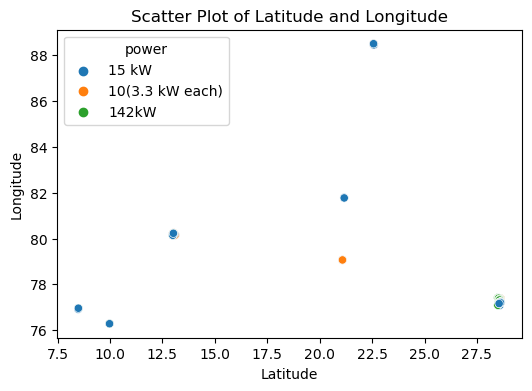

In [153]:
plt.figure(figsize=(6,4))
sns.scatterplot(y = data['longitude'],x = data['latitude'],hue=data['power'])
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(0, 0.5, 'Longitude')

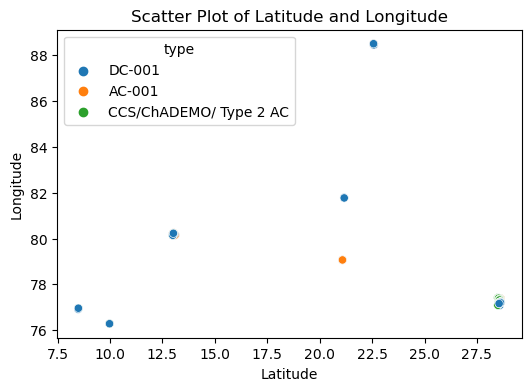

In [155]:
plt.figure(figsize=(6,4))
sns.scatterplot(y = data['longitude'],x = data['latitude'],hue=data['type'])
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(0, 0.5, 'Longitude')

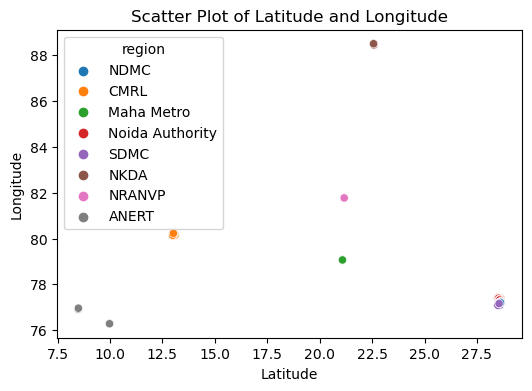

In [154]:
plt.figure(figsize=(6,4))
sns.scatterplot(y = data['longitude'],x = data['latitude'],hue=data['region'])
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [96]:
pd.crosstab(data['region'],data['power'])

power,10(3.3 kW each),142kW,15 kW
region,,,
ANERT,0,3,3
CMRL,4,4,8
Maha Metro,1,0,1
NDMC,0,17,57
NKDA,8,0,8
NRANVP,0,2,2
Noida Authority,7,28,18
SDMC,0,13,18


<AxesSubplot:xlabel='power', ylabel='region'>

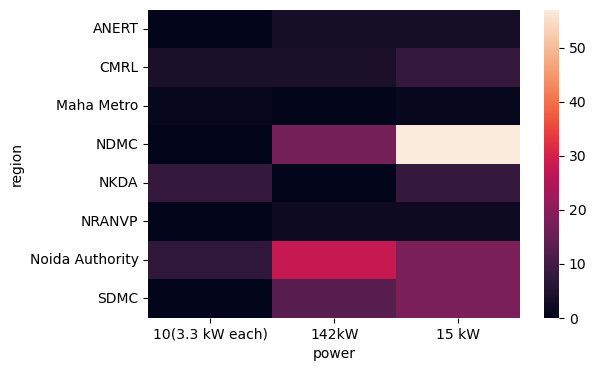

In [156]:
plt.figure(figsize=(6,4))
sns.heatmap(pd.crosstab(data['region'],data['power']))

<Figure size 600x400 with 0 Axes>

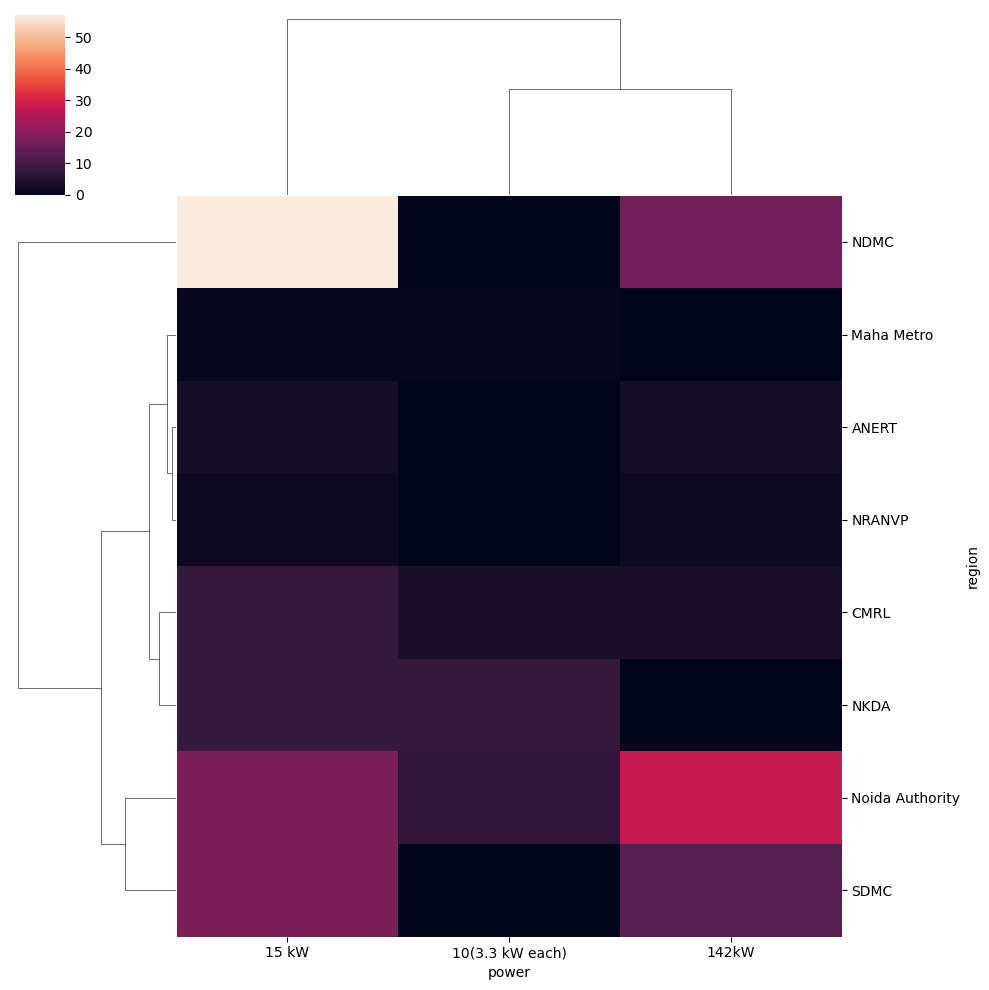

In [157]:
plt.figure(figsize=(6,4))
sns.clustermap(pd.crosstab(data['region'],data['power']))

In [100]:
pd.crosstab(data['region'],data['type'])

type,AC-001,CCS/ChADEMO/ Type 2 AC,DC-001
region,,,
ANERT,0,3,3
CMRL,4,4,8
Maha Metro,1,0,1
NDMC,0,17,57
NKDA,8,0,8
NRANVP,0,2,2
Noida Authority,7,28,18
SDMC,0,13,18


<AxesSubplot:xlabel='type', ylabel='region'>

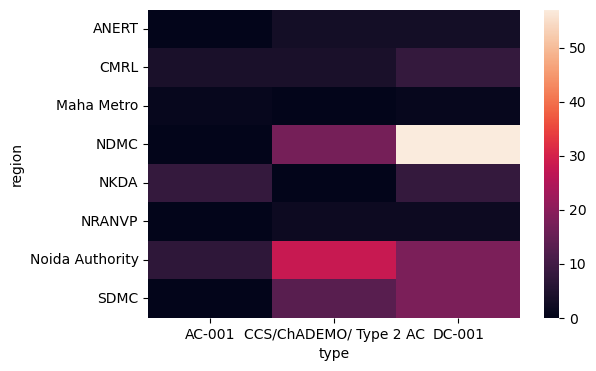

In [160]:
plt.figure(figsize=(6,4))
sns.heatmap(pd.crosstab(data['region'],data['type']))

<Figure size 600x400 with 0 Axes>

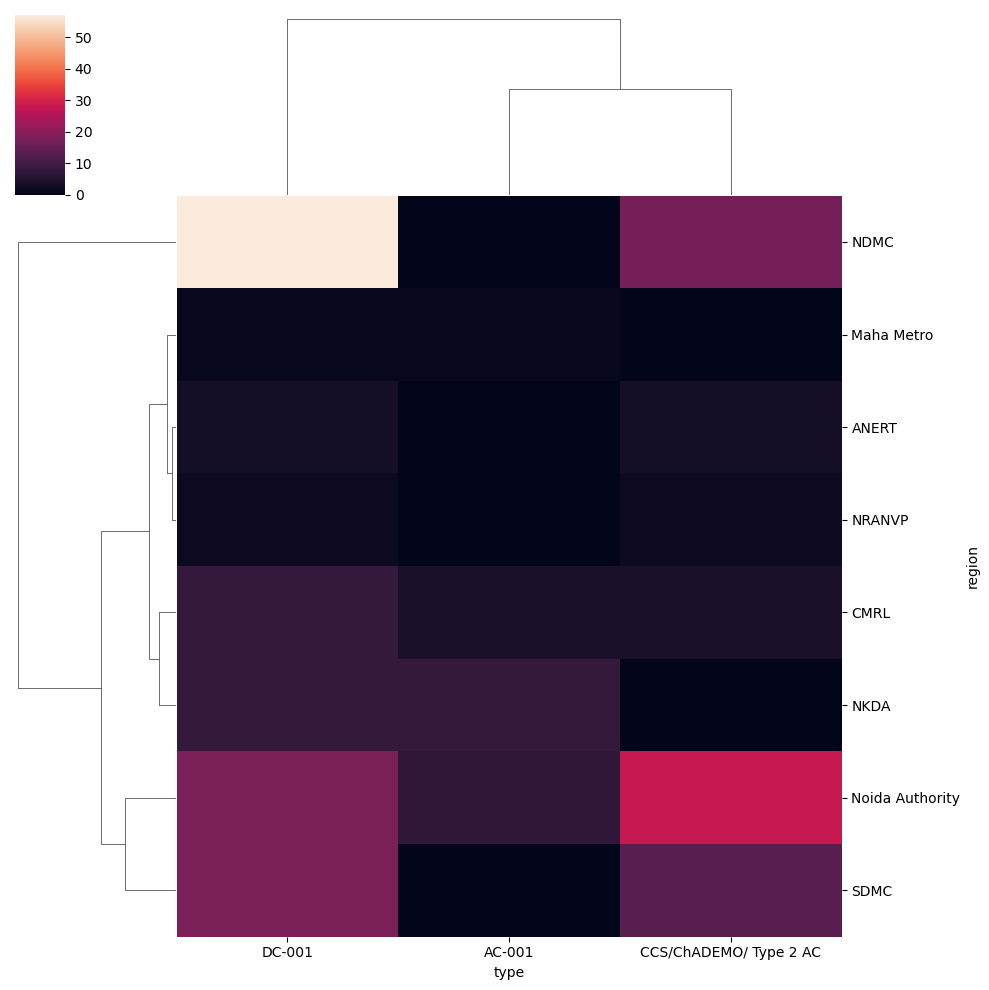

In [159]:
plt.figure(figsize=(6,4))
sns.clustermap(pd.crosstab(data['region'],data['type']))

In [103]:
pd.crosstab(data['power'],data['type'])

type,AC-001,CCS/ChADEMO/ Type 2 AC,DC-001
power,,,
10(3.3 kW each),20,0,0
142kW,0,67,0
15 kW,0,0,115


<AxesSubplot:xlabel='type', ylabel='power'>

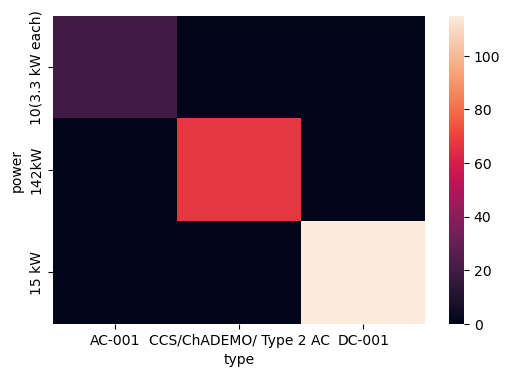

In [161]:
plt.figure(figsize=(6,4))
sns.heatmap(pd.crosstab(data['power'],data['type']))

<Figure size 600x400 with 0 Axes>

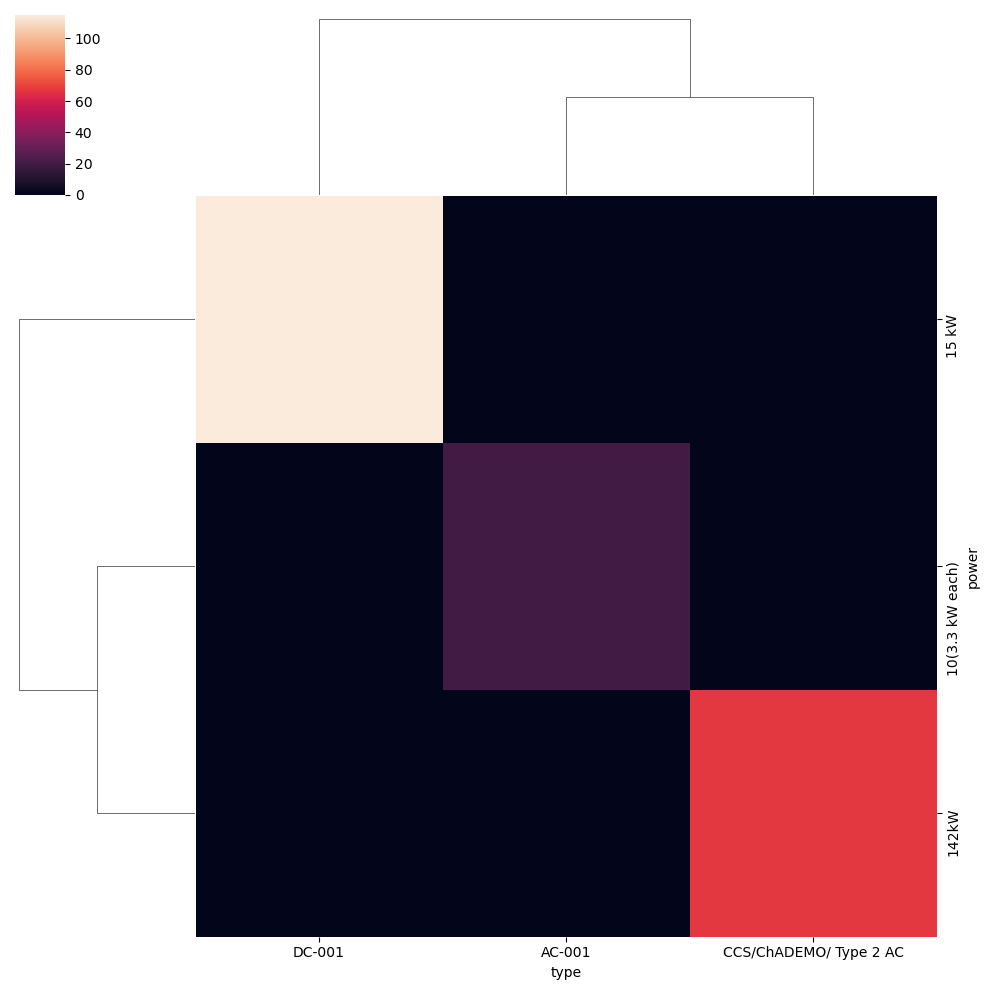

In [158]:
plt.figure(figsize=(6,4))
sns.clustermap(pd.crosstab(data['power'],data['type']))

In [107]:
x = data.drop(['region','address','aux addres','type','power'],axis = 1)
x

,latitude,longitude
0,28.600725,77.226252
1,28.600725,77.226252
2,28.588303,77.217697
3,28.582654,77.220087
4,28.584485,77.220316
...,...,...
197,8.491622,76.956247
198,8.481051,76.912622
199,9.976921,76.277781
200,8.491622,76.956247


In [109]:
y = data.region
y

0       NDMC
1       NDMC
2       NDMC
3       NDMC
4       NDMC
       ...  
197    ANERT
198    ANERT
199    ANERT
200    ANERT
201     SDMC
Name: region, Length: 202, dtype: object

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [135]:
model = svm.SVC(kernel='linear')

In [136]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [137]:
model.score(x_test,y_test)

0.6341463414634146